<a href="https://colab.research.google.com/github/Ichigoboy12/AI/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AI/Hw6/HW#6.csv')
names = ['Year','Month','Day','Week Day','Load','Max Temp','Min Temp','Avg Temp']
data.head()

,Year,Month,Day,Weekday,Load,Max Temp,Min Temp,Avg Temp
0,88,1,1,6,2858,42,28,33.8
1,88,1,2,7,3225,39,24,31.9
2,88,1,3,1,3215,42,30,36.9
3,88,1,4,2,3296,43,38,39.8
4,88,1,5,3,3157,46,38,40.5


In [ ]:
# Load data
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/AI/Hw6/HW#6.csv', header=None, names=['Year', 'Month', 'Day', 'Week Day', 'Load', 'Max Temp', 'Min Temp', 'Avg Temp'])

# ตรวจสอบและแปลงคอลัมน์ 'Load' เป็นตัวเลข
# หากมีค่าที่ไม่สามารถแปลงได้จะถูกตั้งเป็น NaN
data['Load'] = pd.to_numeric(data['Load'], errors='coerce')

# กำจัดแถวที่มีค่า NaN ในคอลัมน์ 'Load'
data = data.dropna(subset=['Load'])

# สร้างฟีเจอร์ lag n-1 และ n-7
data['Load_n-1'] = data['Load'].shift(1)
data['Load_n-7'] = data['Load'].shift(7)

# กำจัดแถวที่มีค่า NaN เนื่องจาก lag feature
data = data.dropna()

# เลือกฟีเจอร์และ target
features = ['Load_n-1', 'Load_n-7', 'Week Day', 'Max Temp', 'Min Temp', 'Avg Temp']
X = data[features]
y = data['Load']

# แบ่งข้อมูล train และ test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=330, random_state=42)

# ใช้ GradientBoostingRegressor กับ Best Parameters ที่ให้มา
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)

# เทรนโมเดล
model.fit(X_train, y_train)

# พยากรณ์และประเมินผล
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# แสดงผลลัพธ์
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2 Score (Test Accuracy): {r2:.2f}")




Mean Absolute Error (MAE): 70.64
Root Mean Squared Error (RMSE): 96.60
R2 Score (Test Accuracy): 0.96


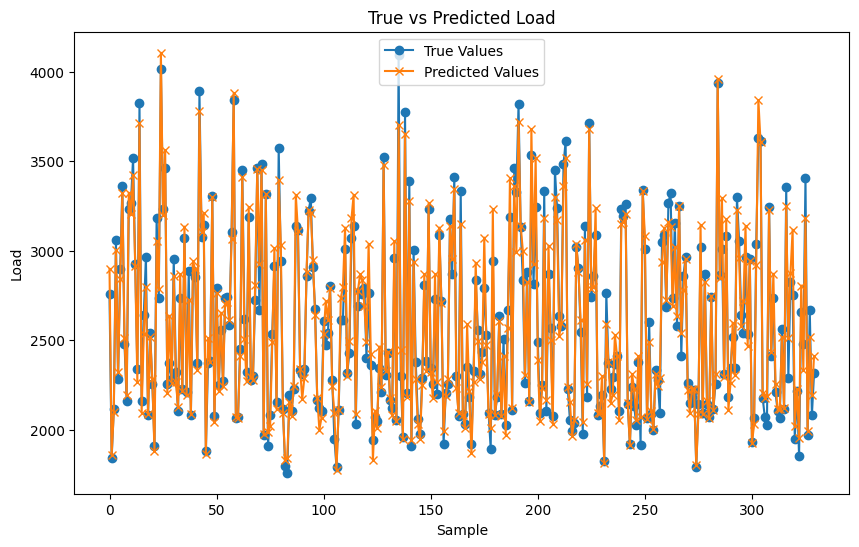

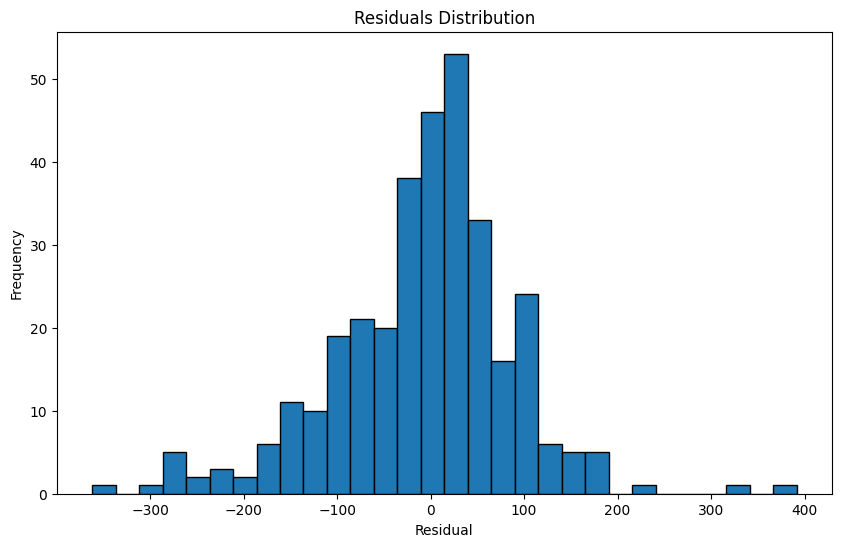

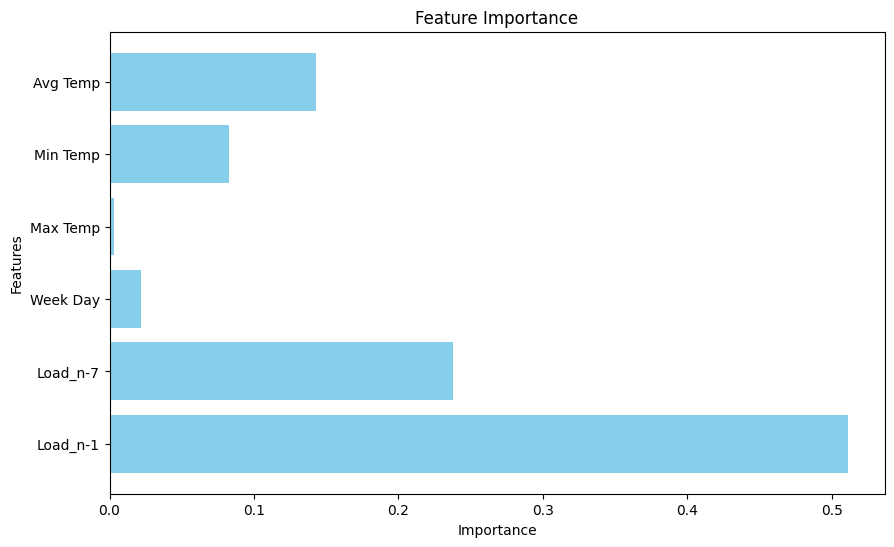

In [ ]:

# Plot: True vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="True Values", marker='o')
plt.plot(y_pred, label="Predicted Values", marker='x')
plt.legend()
plt.title("True vs Predicted Load")
plt.xlabel("Sample")
plt.ylabel("Load")
plt.show()

# Plot: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# Plot: Feature Importance
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()



In [ ]:
import pandas as pd

comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Display the entire comparison table
print(comparison_df)

# Optionally, you can save this comparison table to a CSV file
# comparison_df.to_csv('/content/drive/MyDrive/AI/comparison_results.csv', index=False)


     Actual    Predicted
0    2757.0  2897.950518
1    1841.0  1857.350875
2    2114.0  2098.843094
3    3057.0  3002.424770
4    2284.0  2320.188689
..      ...          ...
325  3405.0  3182.041183
326  1973.0  1994.163768
327  2668.0  2515.201754
328  2082.0  2196.676347
329  2316.0  2411.070999

[330 rows x 2 columns]


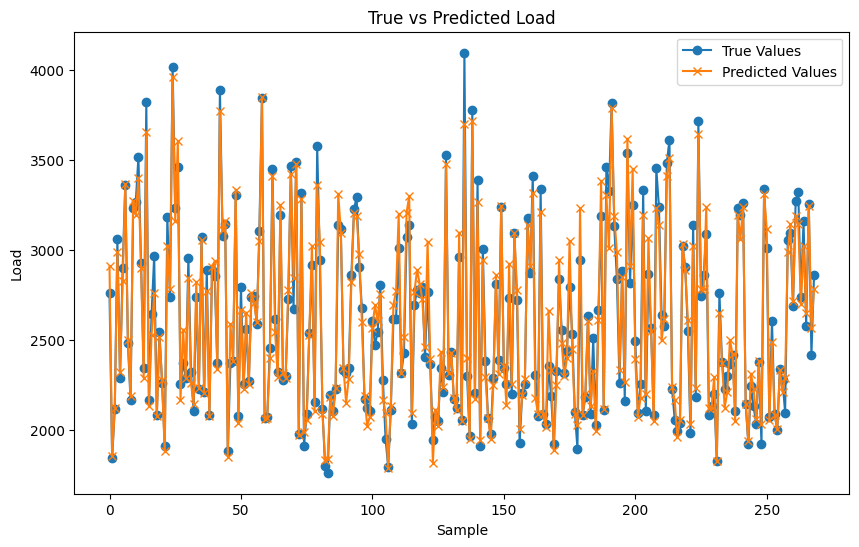

In [ ]:
# กราฟ True vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="True Values", marker='o')
plt.plot(y_pred, label="Predicted Values", marker='x')
plt.legend()
plt.title("True vs Predicted Load")
plt.xlabel("Sample")
plt.ylabel("Load")
plt.show()


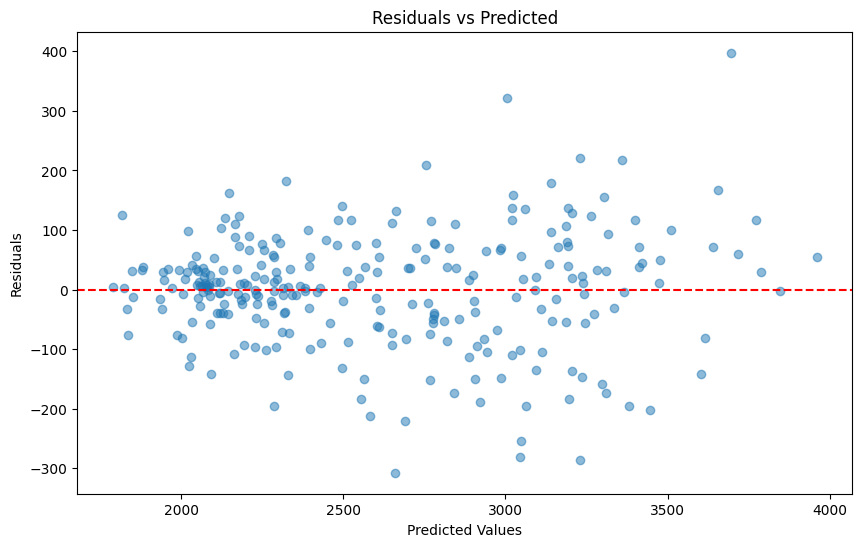

In [ ]:
# กราฟ Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


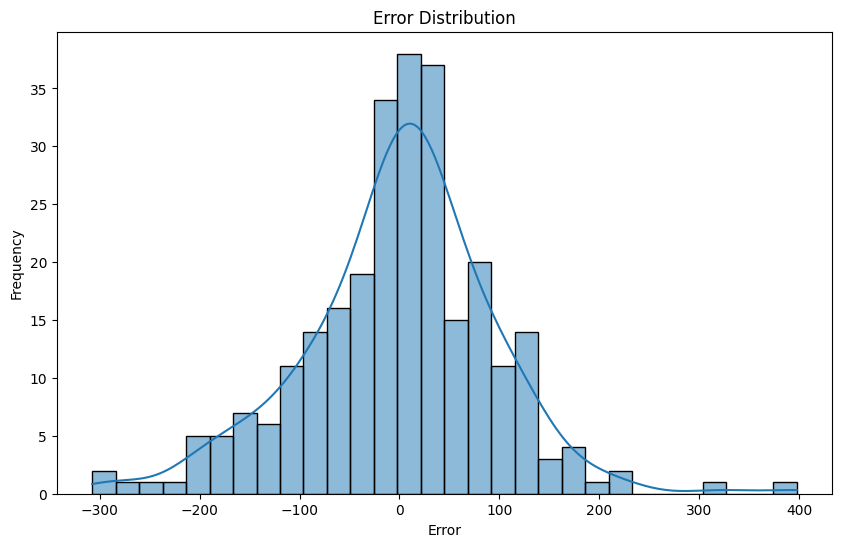

In [ ]:
# กราฟการกระจายข้อผิดพลาด (Error Distribution)
import seaborn as sns

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Error Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()
